In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Data Normalization

    -- Certain features need to be scaled to avoid unnecessary bias in model training & prediction

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

C:\MachineLearning\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\MachineLearning\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


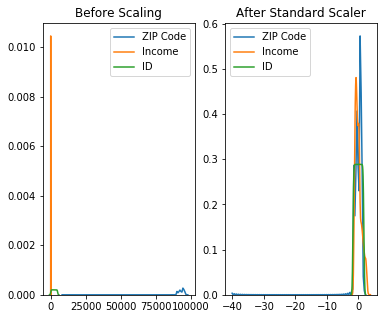

In [4]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(data['ZIP Code'], ax=ax1)
sns.kdeplot(data['Income'], ax=ax1)
sns.kdeplot(data['ID'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(data_scaled['ZIP Code'], ax=ax2)
sns.kdeplot(data_scaled['Income'], ax=ax2)
sns.kdeplot(data_scaled['ID'], ax=ax2)


### Split data in test & train

In [5]:
# split the dependent and independent variables
y = data['Personal Loan']
X = data_scaled.drop('Personal Loan',axis=1)

In [6]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.3)

In [7]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_model = lr_classifier.fit(trainX,trainY)
lr_predictions = lr_model.predict(testX)

C:\MachineLearning\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=2, weights='uniform')
knn_model = knn_classifier.fit(trainX,trainY)
knn_predictions = knn_model.predict(testX)

In [9]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_model = nb_classifier.fit(trainX,trainY)
nb_predictions = nb_model.predict(testX)

In [13]:
def show_roc_curve(falsePositiveRate, truePositiveRate):
    plt.plot(falsePositiveRate, truePositiveRate)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.001,1])
    plt.ylim([0,1.001])
    plt.show()

### Evaluate Training Performance

#### Accuracy, Precision, Recall, F1-Score and Confusion Matrix

#### Plot ROC (= FPR vs TPR) Graph

    - ROC graph is a plot of different values of FPR & TPR for different values of Threshold on which model is evaluated
    - For e.g. if Threshold is set to .5 for classification we would get one set of values for FPR and TPR
    - if Threshold is set to 0.6 we would get another set of values for FPR and TPR
    - So, all of these values of FPR and TPR when plotted give an ROC curve
    - What we are looking for are those values of FPR & TPR which are as close to the top left corner of the graph - Why ? Because at top left corner our TPR would be maximum and FPR would be minimum. Which means that the model is giving least False Positives and maximum number of True Postives

    
********************* Classifier Performance Report On Test Data using Logistic Regression***********************
[[1344   20]
 [  46   90]]
Accuracy score is 0.956
Recall score is 0.956
Precision store is 0.9534221059516025
F1 score is 0.95388249464194


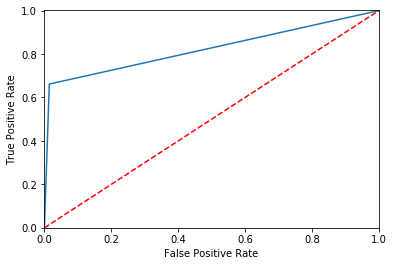

    
********************* Classifier Performance Report On Test Data using K-Nearest Neighbour Regression***********************
[[1360    4]
 [  67   69]]
Accuracy score is 0.9526666666666667
Recall score is 0.9526666666666667
Precision store is 0.9523372659697357
F1 score is 0.9460669125012787


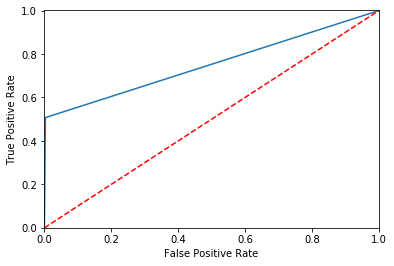

    
********************* Classifier Performance Report On Test Data using Naive Bayes Regression***********************
[[1242  122]
 [  59   77]]
Accuracy score is 0.8793333333333333
Recall score is 0.8793333333333333
Precision store is 0.9031773883509271
F1 score is 0.8892533355735394


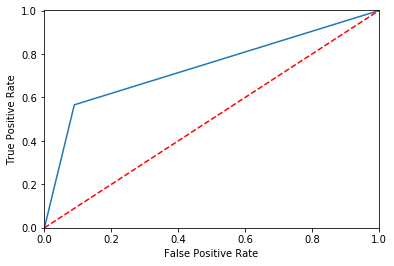

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

def printKNNClassifierPerformance (actualY, predictedY, algorithm):

    print ('    ')
    print ('********************* Classifier Performance Report On Test Data using %s***********************'%(algorithm))
    
    #print the confusion matrix
    c_matrix = confusion_matrix(actualY, predictedY)
    print (c_matrix)

    print ('Accuracy score is',accuracy_score(actualY, predictedY))
    print ('Recall score is', recall_score(actualY, predictedY, average='weighted'))
    print ('Precision store is', precision_score(actualY, predictedY, average='weighted'))
    print ("F1 score is", f1_score(actualY, predictedY, average='weighted'))

    
    fpr, tpr, threshold = roc_curve(actualY, predictedY)
    show_roc_curve(fpr, tpr)

    # Red line in the resultant graph represents those data points where the FPR & TPR is same.

    #print the classification report
    #print (classification_report(actualY, predictedY))
    
printKNNClassifierPerformance(testY, lr_predictions, 'Logistic Regression')
printKNNClassifierPerformance(testY, knn_predictions, 'K-Nearest Neighbour Regression')
printKNNClassifierPerformance(testY, nb_predictions, 'Naive Bayes Regression')

### Summary

    We see that Logistic Regression algorithm is able to give us predictions with maximum accuracy and f1-score